# Imports

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score

In [269]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [220]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score
# import xgboost as xgb

# Data preparation

In [221]:
df = pd.read_csv('final_depression_dataset_1.csv')
df

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [223]:
df = df.drop(['Name', 'CGPA', 'Study Satisfaction', 'Academic Pressure'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2556 non-null   object 
 1   Age                                    2556 non-null   int64  
 2   City                                   2556 non-null   object 
 3   Working Professional or Student        2556 non-null   object 
 4   Profession                             1883 non-null   object 
 5   Work Pressure                          2054 non-null   float64
 6   Job Satisfaction                       2054 non-null   float64
 7   Sleep Duration                         2556 non-null   object 
 8   Dietary Habits                         2556 non-null   object 
 9   Degree                                 2556 non-null   object 
 10  Have you ever had suicidal thoughts ?  2556 non-null   object 
 11  Work

In [224]:
# Вычисляем частоты каждой категории
freq = df['Work Pressure'].value_counts(normalize=True)

# Генерируем случайные значения для заполнения пропусков согласно распределению
mask = df['Work Pressure'].isna()
df.loc[mask,"Work Pressure"] = np.random.choice(freq.index, size=mask.sum(), p=freq.values)
df['Work Pressure'].value_counts()

Work Pressure
5.0    533
2.0    522
3.0    513
4.0    501
1.0    487
Name: count, dtype: int64

In [225]:
# Вычисляем частоты каждой категории
freq = df['Job Satisfaction'].value_counts(normalize=True)

# Генерируем случайные значения для заполнения пропусков согласно распределению
mask = df['Job Satisfaction'].isna()
df.loc[mask,"Job Satisfaction"] = np.random.choice(freq.index, size=mask.sum(), p=freq.values)
df['Job Satisfaction'].value_counts()

Job Satisfaction
5.0    552
2.0    533
3.0    497
1.0    497
4.0    477
Name: count, dtype: int64

In [226]:
df['Profession'] = df['Profession'].fillna('Other')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2556 non-null   object 
 1   Age                                    2556 non-null   int64  
 2   City                                   2556 non-null   object 
 3   Working Professional or Student        2556 non-null   object 
 4   Profession                             2556 non-null   object 
 5   Work Pressure                          2556 non-null   float64
 6   Job Satisfaction                       2556 non-null   float64
 7   Sleep Duration                         2556 non-null   object 
 8   Dietary Habits                         2556 non-null   object 
 9   Degree                                 2556 non-null   object 
 10  Have you ever had suicidal thoughts ?  2556 non-null   object 
 11  Work

In [228]:
bins = ['Depression', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
df['Depression'] = df['Depression'].apply(lambda x: int(x == 'Yes'))
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].apply(lambda x: int(x == 'Yes'))
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].apply(lambda x: int(x == 'Yes'))

In [229]:
bool_columns = ['Gender']
df[bool_columns] = df[bool_columns].map(lambda x: {'female': 1, 'male': 0}[x.lower()])

In [230]:
for col in ['Age', 'Work Pressure', 'Job Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression']:
  nc = df.select_dtypes(include='number').columns
  scaler = MinMaxScaler()
  df[nc] = scaler.fit_transform(df[nc])

In [231]:
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,0.452381,Ghaziabad,Working Professional,Teacher,0.25,0.75,7-8 hours,Moderate,MA,0.0,0.500000,0.25,0.0,0.0
1,0.0,1.000000,Kalyan,Working Professional,Financial Analyst,0.75,0.50,5-6 hours,Unhealthy,B.Com,1.0,0.000000,0.75,1.0,0.0
2,1.0,0.571429,Bhopal,Working Professional,Teacher,0.25,0.50,5-6 hours,Moderate,M.Com,0.0,0.000000,0.25,0.0,0.0
3,1.0,0.619048,Thane,Working Professional,Teacher,0.50,1.00,7-8 hours,Healthy,MD,1.0,0.083333,0.25,1.0,0.0
4,0.0,0.714286,Indore,Working Professional,UX/UI Designer,0.75,0.50,7-8 hours,Moderate,BE,1.0,0.500000,1.00,1.0,0.0


In [232]:
df.select_dtypes(include='object').columns

Index(['City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree'],
      dtype='object')

In [233]:
catc = df.select_dtypes(include='object').columns
newc = pd.get_dummies(df[catc], dtype=int)
df = pd.concat([df.drop(catc, axis=1), newc], axis=1)
df

,Gender,Age,Work Pressure,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_Agra,...,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_PhD
0,1.0,0.452381,0.25,0.75,0.0,0.500000,0.25,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.000000,0.75,0.50,1.0,0.000000,0.75,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.571429,0.25,0.50,0.0,0.000000,0.25,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.619048,0.50,1.00,1.0,0.083333,0.25,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.714286,0.75,0.50,1.0,0.500000,1.00,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,0.0,0.166667,0.00,1.00,1.0,1.000000,0.50,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2552,1.0,0.119048,0.50,0.00,1.0,0.666667,0.50,0.0,1.0,0,...,0,1,0,0,0,0,0,0,0,0
2553,1.0,0.142857,0.00,0.75,1.0,0.333333,0.75,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2554,1.0,0.904762,0.25,0.50,0.0,0.333333,1.00,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

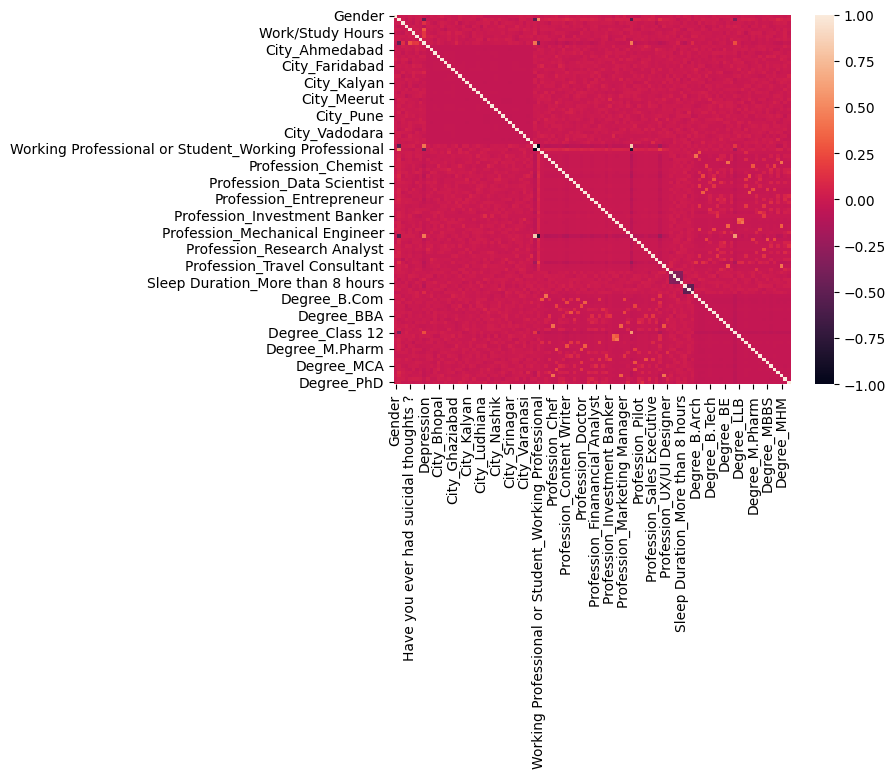

In [234]:
sns.heatmap(df.corr())

In [235]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Depression', axis=1), df['Depression'])

# Models

## Graph

In [236]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Test Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Test Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

## FNN

## Graph

In [237]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Test Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Test Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

## Полносвязная

### Compile

In [287]:
model_fnn = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.35),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [288]:
model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [289]:
history_fnn = model_fnn.fit(
    x_train, y_train,
    epochs=15,
    batch_size=16,
    # validation_split=0.2,
    verbose=1
)

Epoch 1/15


120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7252 - loss: 0.5310
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8662 - loss: 0.2995
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8981 - loss: 0.2408
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8869 - loss: 0.2425
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9187 - loss: 0.1924
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9210 - loss: 0.1930
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9371 - loss: 0.1503
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9329 - loss: 0.1598
Epoch 9/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9221 - loss: 0.1792
Epoch 10/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9369 - loss: 0.1409
Epoch 11/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9429 - loss: 0.1360
Epoch 12/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

In [290]:
# plot_results(history_fnn, "FNN")

In [291]:
y_pred_fnn = model_fnn.predict(x_test)
y_pred_fnn = (y_pred_fnn > 0.5).astype(int)
print(classification_report(y_test, y_pred_fnn))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_fnn))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       520
         1.0       0.77      0.75      0.76       119

    accuracy                           0.91       639
   macro avg       0.86      0.85      0.85       639
weighted avg       0.91      0.91      0.91       639

ROC-AUC: 0.8489495798319328


## Lol

In [243]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return acc, prec, r2


models = {
    "Linear Regression": LinearRegression(),
    "Logistical Regression": LogisticRegression(),
    "Random Forest": RandomForestRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=1000),
    # "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100),
}

results = {}
for name, model in models.items():
    acc, prec, r2 = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[name] = {"ACC": acc, "PREC": prec, "R2": r2}

for model_name, metrics in results.items():
    print(
        f"{model_name} - ACC: {metrics['ACC']:.4f}, PREC: {metrics['PREC']:.4f}, R2: {metrics['R2']:.4f}"
    )

Linear Regression - ACC: 0.8811, PREC: 0.7590, R2: 0.2152
Logistical Regression - ACC: 0.9077, PREC: 0.8000, R2: 0.3907
Random Forest - ACC: 0.8889, PREC: 0.7667, R2: 0.2668
MLP Regressor - ACC: 0.8983, PREC: 0.7596, R2: 0.3288


## Hypeparams

In [244]:
import warnings
warnings.filterwarnings("ignore")

In [245]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],      # количество деревьев
    "max_depth": [5, 10, 15, 20, None],       # максимальная глубина дерева
    "min_samples_split": [2, 5, 10],          # минимальное число образцов для разделения узла
    "min_samples_leaf": [1, 2, 4],            # минимальное число образцов в листе
    "max_features": ["sqrt", "log2", None],    # количество признаков для выбора при разбиении
    "bootstrap": [True, False],               # использовать ли бутстрап выборки
}

# Создаём GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_g = GridSearchCV(
    rf,
    param_grid,
    cv=5,               # кросс-валидация (5 фолдов)
    scoring="accuracy",  # метрика (можно изменить на "f1", "roc_auc" и т.д.)
    n_jobs=-1           # использовать все ядра CPU
)

# Запускаем поиск (X_train, y_train должны быть определены)
rf_g.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_prob = rf_g.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)